In [1]:
import tensorflow as tf
import utils as u
import h5py
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline
import itertools

import keras 
from keras.models import load_model
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras import backend as K
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D,Activation,BatchNormalization,LeakyReLU
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
data_folder = '../data'
file_name = 'HCAL_digi+rechit_occ.hdf5'
group = 'DigiTask_Occupancy_depth_depth1'

input_file=h5py.File(data_folder+"/"+file_name,'r+')

data_sample= np.array(input_file[group])


print data_sample.shape

data_sample=data_sample[:,:,26:58]

print data_sample.shape

(999, 72, 84)
(999, 72, 32)


Shape of regular image is:  (999, 72, 32)
Shape of dead image is:  (999, 72, 32)
Shape of hot image is:  (999, 72, 32)



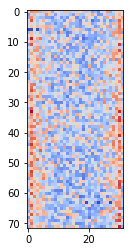

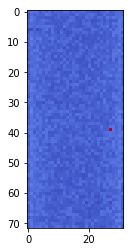

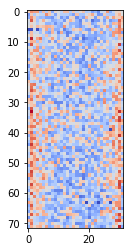

In [3]:
input_images=data_sample[:]
hotregion_image=[]
deadregion_image=[]

for k in input_images:
    a=np.random.randint(input_images.shape[2]-1)
    b=np.random.randint(input_images.shape[1]-1)

    xdim=(a,a+1)
    ydim=(b,b+1)
   
    hotregion_image.append( u.hotregion(k,xdim,ydim))
    deadregion_image.append(u.killregion(k,xdim,ydim))
       
    
hotregion_image=np.array(hotregion_image)
deadregion_image=np.array(deadregion_image)

print "Shape of regular image is: ",input_images.shape
print "Shape of dead image is: " ,deadregion_image.shape
print "Shape of hot image is: " ,hotregion_image.shape

print ''
im=plt.imshow(input_images[1],cmap=cm.coolwarm)
plt.show()
plt.clf()

im=plt.imshow(hotregion_image[1],cmap=cm.coolwarm)
plt.show()
plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
         #as opposed to plt.close which closes the window. If you are showing many images at a time without
         #closing the window it is better.

im=plt.imshow(deadregion_image[1],cmap=cm.coolwarm)
plt.show()
plt.clf()
#input_image=np.reshape(input_image,(input_image.shape[0],input_image.shape[1]))


If you want to see the group of images

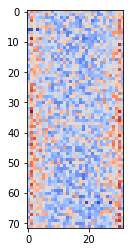

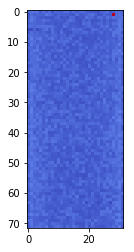

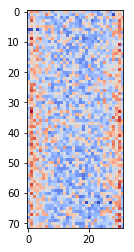

-----------------


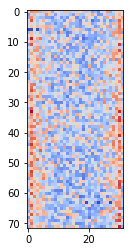

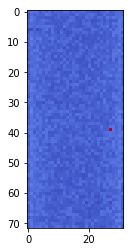

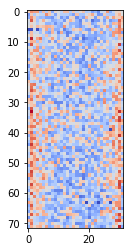

-----------------


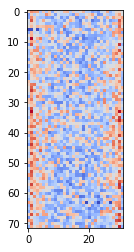

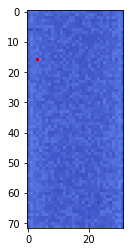

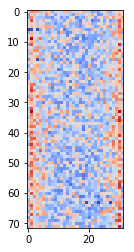

-----------------


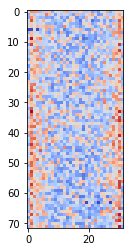

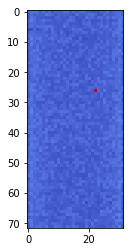

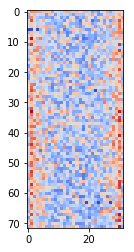

-----------------


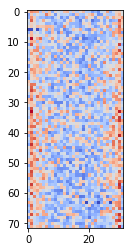

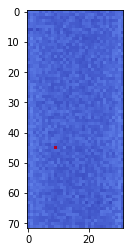

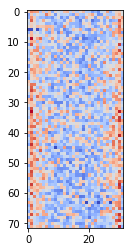

-----------------


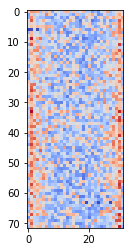

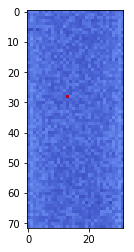

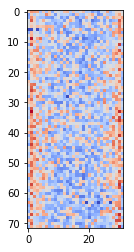

-----------------


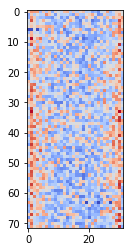

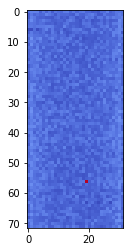

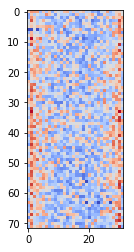

-----------------


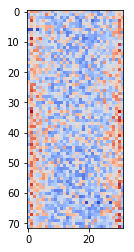

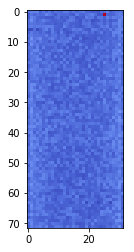

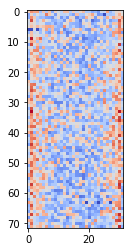

-----------------


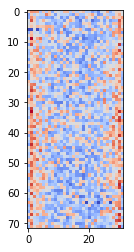

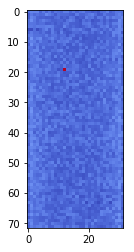

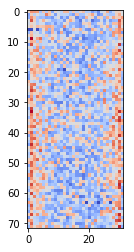

-----------------


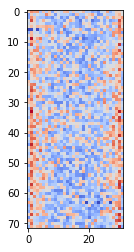

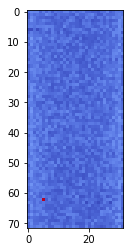

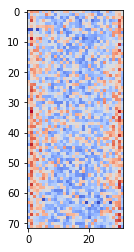

-----------------


In [4]:
for k in range(10):
    im=plt.imshow(input_images[k],cmap=cm.coolwarm)
    plt.show()
    plt.clf()

    im=plt.imshow(hotregion_image[k],cmap=cm.coolwarm)
    plt.show()
    plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
             #as opposed to plt.close which closes the window. If you are showing many images at a time without
             #closing the window it is better.
    
    im=plt.imshow(deadregion_image[k],cmap=cm.coolwarm)
    plt.show()
    plt.clf()
    print '-----------------'


In [5]:
sample= np.append(data_sample,hotregion_image,axis=0)
sample= np.append(sample,deadregion_image,axis=0)


print sample.shape

(2997, 72, 32)


For CNN
create the corresponding label matrices

In [6]:
X=np.copy(sample)

y=np.zeros((sample.shape[0],1))


In [7]:
#this is because I am only going to add the hot and dead region images

for i in range(2,0,-1):
    y[-i*input_images.shape[0]:]=3-i
#if you want it as intergers leave this as it is
#if you would like it as a vector then do this
y=to_categorical(y,3)
#print 'First few labels are \n',y[:5]
#print y.shape
#print 'Labels from 1 class to another are like this\n',y[998:1004]
#print 'Labels from 1 class to another are like this\n',y[1997:2004]


In [8]:
# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

print "X shape is: ",X.shape
print "y shape is: ",y.shape
# input image dimensions
img_rows, img_cols = X.shape[1],X.shape[2]

X shape is:  (2997, 72, 32)
y shape is:  (2997, 3)


Xtrain.shape (1798, 72, 32)
Xtest.shape (1199, 72, 32)
ytrain.shape (1798, 3)
ytest.shape (1199, 3)
Printing labels and their corresponding images
-------------------
[ 0.  1.  0.]


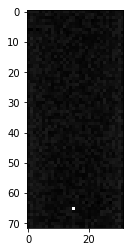

-------------------
[ 0.  1.  0.]


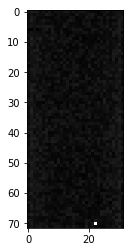

-------------------
[ 1.  0.  0.]


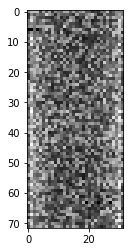

-------------------
[ 0.  1.  0.]


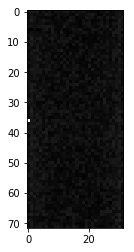

-------------------
[ 1.  0.  0.]


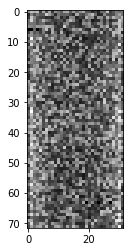

-------------------
[ 1.  0.  0.]


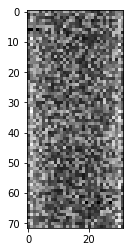

-------------------
[ 1.  0.  0.]


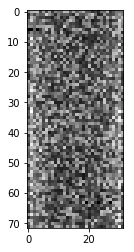

-------------------
[ 0.  0.  1.]


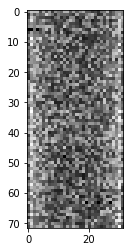

-------------------
[ 0.  1.  0.]


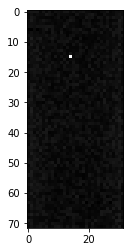

-------------------
[ 0.  1.  0.]


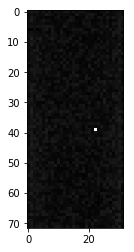

Xtrain.shape after if statement (1798, 72, 32, 1)
Xtest.shape after if statement (1199, 72, 32, 1)
ytrain.shape after if statement (1798, 3)
ytest.shape after if statement (1199, 3)


In [9]:

Xtrain, Xtest ,ytrain, ytest =train_test_split(X,y,test_size=.4,random_state =5 )

print 'Xtrain.shape',Xtrain.shape
print 'Xtest.shape',Xtest.shape
print 'ytrain.shape',ytrain.shape
print 'ytest.shape',ytest.shape
print 'Printing labels and their corresponding images'
    
for k in range(10):
    print'-------------------'
    print ytrain[k]
    im=plt.imshow(Xtrain[k],cmap=cm.gray)
    plt.show()
    plt.clf()


Xtrain, Xtest,input_shape= u.check_test_and_train_images_format(Xtrain, Xtest, img_rows, img_cols)

print 'Xtrain.shape after if statement',Xtrain.shape
print 'Xtest.shape after if statement',Xtest.shape
print 'ytrain.shape after if statement',ytrain.shape
print 'ytest.shape after if statement',ytest.shape
    


# Creating and training the model

In [10]:
# this is the dummy model
model = Sequential([
BatchNormalization(input_shape=input_shape),
Conv2D(8, kernel_size=(3, 3), strides=(2, 2), activation='relu'),
Conv2D(8, kernel_size=(3, 3), strides=(2, 2), activation='relu'),

Dropout(0.25),

Flatten(),

Dense(3, activation='softmax')

])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',#Adam(lr=1e-3),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 72, 32, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 15, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 7, 8)          584       
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 7, 8)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 952)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 2859      
Total params: 3,527
Trainable params: 3,525
Non-trainable params: 2
_________________________________________________________________


In [12]:
checkpointer = ModelCheckpoint(filepath='best_model_good_hot_dead.hdf5', verbose=4, save_best_only=True)
earlystop= EarlyStopping(monitor='val_loss', min_delta=0, patience=15 ,verbose=4, mode='auto')

history = model.fit(Xtrain,ytrain,epochs=250
                    ,verbose=2
                    ,validation_data=(Xtest,ytest)
                    ,shuffle=True
                    ,callbacks=[checkpointer])#,earlystop])

Train on 1798 samples, validate on 1199 samples
Epoch 1/250
Epoch 00001: val_loss improved from inf to 1.20856, saving model to best_model_good_hot_dead.hdf5
 - 1s - loss: 1.1073 - acc: 0.3209 - val_loss: 1.2086 - val_acc: 0.3069
Epoch 2/250
Epoch 00002: val_loss improved from 1.20856 to 1.06785, saving model to best_model_good_hot_dead.hdf5
 - 1s - loss: 1.0714 - acc: 0.4216 - val_loss: 1.0678 - val_acc: 0.3511
Epoch 3/250
Epoch 00003: val_loss improved from 1.06785 to 1.01552, saving model to best_model_good_hot_dead.hdf5
 - 1s - loss: 1.0258 - acc: 0.4844 - val_loss: 1.0155 - val_acc: 0.4779
Epoch 4/250
Epoch 00004: val_loss improved from 1.01552 to 0.96059, saving model to best_model_good_hot_dead.hdf5
 - 1s - loss: 0.9708 - acc: 0.5189 - val_loss: 0.9606 - val_acc: 0.5313
Epoch 5/250
Epoch 00005: val_loss improved from 0.96059 to 0.87159, saving model to best_model_good_hot_dead.hdf5
 - 1s - loss: 0.8876 - acc: 0.5590 - val_loss: 0.8716 - val_acc: 0.5530
Epoch 6/250
Epoch 00006: v

Epoch 51/250
Epoch 00051: val_loss did not improve
 - 1s - loss: 0.4784 - acc: 0.6963 - val_loss: 0.5250 - val_acc: 0.6606
Epoch 52/250
Epoch 00052: val_loss did not improve
 - 1s - loss: 0.4778 - acc: 0.6841 - val_loss: 0.5335 - val_acc: 0.6622
Epoch 53/250
Epoch 00053: val_loss did not improve
 - 1s - loss: 0.4859 - acc: 0.6841 - val_loss: 0.5269 - val_acc: 0.6355
Epoch 54/250
Epoch 00054: val_loss did not improve
 - 1s - loss: 0.4804 - acc: 0.6863 - val_loss: 0.5263 - val_acc: 0.6047
Epoch 55/250
Epoch 00055: val_loss did not improve
 - 1s - loss: 0.4676 - acc: 0.6958 - val_loss: 0.5292 - val_acc: 0.6030
Epoch 56/250
Epoch 00056: val_loss did not improve
 - 1s - loss: 0.4744 - acc: 0.6891 - val_loss: 0.5433 - val_acc: 0.6297
Epoch 57/250
Epoch 00057: val_loss did not improve
 - 1s - loss: 0.4834 - acc: 0.6752 - val_loss: 0.5223 - val_acc: 0.6364
Epoch 58/250
Epoch 00058: val_loss did not improve
 - 1s - loss: 0.4759 - acc: 0.6858 - val_loss: 0.5291 - val_acc: 0.6147
Epoch 59/250
Epo

Epoch 118/250
Epoch 00118: val_loss did not improve
 - 1s - loss: 0.4432 - acc: 0.7269 - val_loss: 0.5604 - val_acc: 0.6280
Epoch 119/250
Epoch 00119: val_loss did not improve
 - 1s - loss: 0.4604 - acc: 0.7314 - val_loss: 0.5469 - val_acc: 0.6122
Epoch 120/250
Epoch 00120: val_loss did not improve
 - 1s - loss: 0.4487 - acc: 0.7369 - val_loss: 0.5472 - val_acc: 0.6030
Epoch 121/250
Epoch 00121: val_loss did not improve
 - 1s - loss: 0.4456 - acc: 0.7341 - val_loss: 0.5584 - val_acc: 0.6622
Epoch 122/250
Epoch 00122: val_loss did not improve
 - 1s - loss: 0.4557 - acc: 0.7397 - val_loss: 0.5507 - val_acc: 0.6013
Epoch 123/250
Epoch 00123: val_loss did not improve
 - 1s - loss: 0.4479 - acc: 0.7325 - val_loss: 0.5440 - val_acc: 0.6247
Epoch 124/250
Epoch 00124: val_loss did not improve
 - 1s - loss: 0.4524 - acc: 0.7336 - val_loss: 0.5481 - val_acc: 0.6564
Epoch 125/250
Epoch 00125: val_loss did not improve
 - 1s - loss: 0.4510 - acc: 0.7225 - val_loss: 0.5464 - val_acc: 0.6339
Epoch 12

Epoch 00184: val_loss did not improve
 - 1s - loss: 0.4171 - acc: 0.7725 - val_loss: 0.5832 - val_acc: 0.6272
Epoch 185/250
Epoch 00185: val_loss did not improve
 - 1s - loss: 0.4315 - acc: 0.7592 - val_loss: 0.5925 - val_acc: 0.6163
Epoch 186/250
Epoch 00186: val_loss did not improve
 - 1s - loss: 0.4085 - acc: 0.7714 - val_loss: 0.5942 - val_acc: 0.6772
Epoch 187/250
Epoch 00187: val_loss did not improve
 - 1s - loss: 0.4224 - acc: 0.7703 - val_loss: 0.5773 - val_acc: 0.6239
Epoch 188/250
Epoch 00188: val_loss did not improve
 - 1s - loss: 0.4132 - acc: 0.7781 - val_loss: 0.5871 - val_acc: 0.6289
Epoch 189/250
Epoch 00189: val_loss did not improve
 - 1s - loss: 0.4135 - acc: 0.7736 - val_loss: 0.5852 - val_acc: 0.5930
Epoch 190/250
Epoch 00190: val_loss did not improve
 - 1s - loss: 0.4218 - acc: 0.7686 - val_loss: 0.5671 - val_acc: 0.6472
Epoch 191/250
Epoch 00191: val_loss did not improve
 - 1s - loss: 0.4032 - acc: 0.7781 - val_loss: 0.5819 - val_acc: 0.6647
Epoch 192/250
Epoch 00

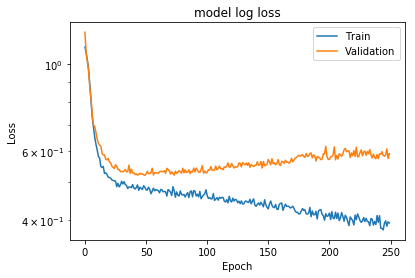

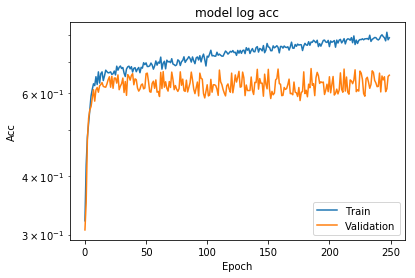

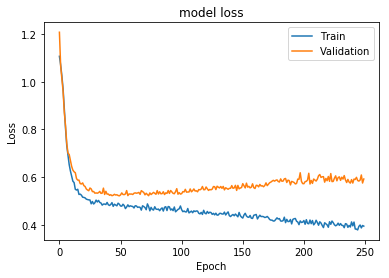

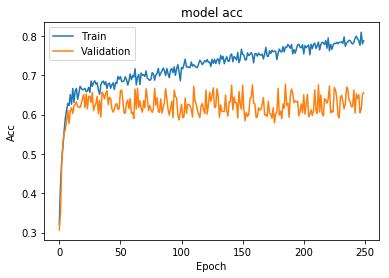

In [13]:
u.plot_loss(history, "model log loss","log")
u.plot_acc(history, "model log acc","log")

u.plot_loss(history, "model loss","linear")
u.plot_acc(history, "model acc","linear")



In [14]:
best_model= load_model('best_model_good_hot_dead.hdf5')

In [15]:
ypred=best_model.predict(Xtest)
ypredproba=best_model.predict_proba(Xtest)
#it's preferable to use .predict_classes because .predict might give probabilities 
#and not the label's in the case of multiclass
ypredclass=best_model.predict_classes(Xtest)

ypredclass=np.reshape(ypredclass,(ypredclass.shape[0],1))
#use argmax(1) to give the position of max value in a categorical variable like ytest
#it's basically a .predict_classes for ytest
ytestclass= ytest.argmax(1)
ytestclass=np.reshape(ytestclass,(ytestclass.shape[0],1))

In [16]:
np.all(ypredproba==ypred)
#this confirms my suspicions

True

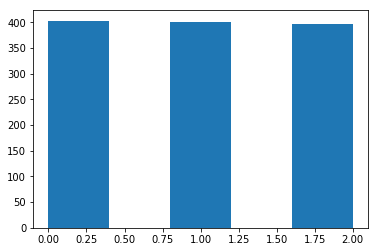

In [62]:
plt.hist(ytestclass,bins=5,range=None, density=None, weights=None,
         cumulative=False, bottom=None,
         histtype=u'stepfilled', align=u'mid', orientation=u'vertical',rwidth=None,
         log=False, color=None, label=None,
         stacked=False, normed=None, hold=None, data=None)
plt.show()

In [17]:
print ytestclass[40:50],'\n\n\n', ypredclass[40:50]

[[0]
 [1]
 [0]
 [0]
 [2]
 [0]
 [1]
 [1]
 [1]
 [2]] 


[[2]
 [1]
 [0]
 [2]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]]


In [18]:
# from categorial to lable indexing


#yprednotcategorical =ypred.argmax(1)
#print ytestnotcategorical
#print yprednotcategorical
#print metrics.accuracy_score(ytest,ypred)
confusion= metrics.confusion_matrix(ytestclass,ypredclass)

Confusion matrix, without normalization
[[219   0 184]
 [  2 390   8]
 [267   0 129]]


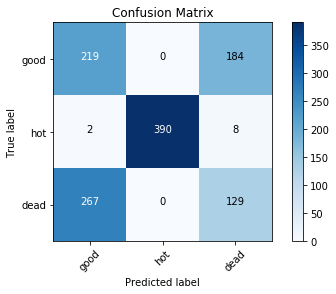

In [19]:
plotlabels=['good','hot','dead']
u.plot_confusion_matrix(confusion,plotlabels,title='Confusion Matrix')

# Now I'm going to recreate this model using the SKlearn API wrapper from Keras

0.693152487001 For the label # 0


NameError: name 'line1' is not defined

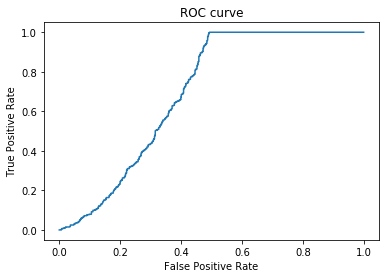

In [27]:
for i in range(3):
    fpr,tpr,thresholds= roc_curve(ytestclass,ypredproba[:,i],pos_label=i)
    
    
    roc_auc = auc(fpr, tpr)
    
    print roc_auc,'For the label #',i
    
    plt.plot(fpr,tpr,label="Line #i")#, color='green', linestyle='dashed',markerfacecolor='blue',marker='o' )#)markersize=12
    #plt.xlim([-.1,1.5])
    #plt.ylim([-0.1,1.5])    
    plt.title('ROC curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    #plt.legend()
    plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
    plt.grid(True)
    

In [24]:
plt.plot?

In [22]:
print fpr

[ 0.          0.00124533  0.00747198  0.00747198  0.00871731  0.00871731
  0.00996264  0.00996264  0.01494396  0.01494396  0.01743462  0.01743462
  0.01992528  0.01992528  0.02615193  0.02739726  0.03611457  0.03611457
  0.03985056  0.03985056  0.04109589  0.04109589  0.04358655  0.04358655
  0.04732254  0.04732254  0.04856787  0.04856787  0.05105853  0.05105853
  0.05977584  0.05977584  0.06475716  0.06475716  0.06600249  0.06600249
  0.06849315  0.06849315  0.08094645  0.08094645  0.08592777  0.08592777
  0.08841843  0.08841843  0.08966376  0.08966376  0.09589041  0.09589041
  0.10087173  0.10087173  0.10211706  0.10211706  0.10336239  0.10336239
  0.10460772  0.10460772  0.10585305  0.10585305  0.10834371  0.10834371
  0.11457036  0.11457036  0.11581569  0.11581569  0.11706102  0.11706102
  0.11830635  0.11830635  0.11955168  0.12702366  0.12702366  0.12951432
  0.12951432  0.13200498  0.13200498  0.1369863   0.1369863   0.13947696
  0.13947696  0.14072229  0.14072229  0.14570361  0